In [2]:
import pandas as pd

dfInfo = pd.read_csv('./dataset_information2.csv')[['Dataset Name', 'Modality', 'Body Part', 'Sub-region', 'Segmentation Targets', 'Dimension', 'Secure', 'Link']]
dfInfo = dfInfo[dfInfo['Secure'] == 'O']
existDs = dfInfo['Dataset Name'].tolist()
print(len(dfInfo))
dfInfo

136


/tmp/ipykernel_203989/880583975.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Dataset Name,Modality,Body Part,Sub-region,Segmentation Targets,Dimension,Secure,Link
0,AbdomenCT-1K,CT,Abdomen,-,"Liver, kidneys, pancreas, spleen",3D,O,https://github.com/JunMa11/AbdomenCT-1K
1,AMOS 2022,CT/MR,Abdomen,-,Abdominal organ,3D,O,https://amos22.grand-challenge.org/
2,AutoPET2023,CT/PET,Body,-,Whole-body tumor,3D,O,https://wiki.cancerimagingarchive.net/pages/vi...
3,COVID-19 Seg. Challenge,CT,Thorax,Lung,COVID-19 infections,3D,O,https://covid-segmentation.grand-challenge.org...
4,COVID-19-CT-Seg,CT,Thorax,Lung,"COVID-19 infections, Left Lung, Right Lung",3D,O,https://github.com/JunMa11/COVID-19-CT-Seg-Ben...
...,...,...,...,...,...,...,...,...
152,RBIS-DDSM,X-ray,Thorax,Breast,Breast Cancer,2D,O,https://ieee-dataport.org/documents/re-curated...
153,BSISeg,X-ray,Pelvis,-,bone,2D,O,https://ieee-dataport.org/documents/bone-scan-...
154,InnerEarSeg,CT,Head and Neck,Ear,INNER EAR,3D,O,https://ieee-dataport.org/documents/ct-trainin...
155,3DLSC-COVID,CT,Thorax,Chest,"COVID-19, CAP",3D,O,https://ieee-dataport.org/documents/3dlsc-covid


/tmp/ipykernel_203989/2253539350.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cntBymodality = pd.value_counts(dfInfo['Modality'].values, sort=True)


<Axes: ylabel='count'>

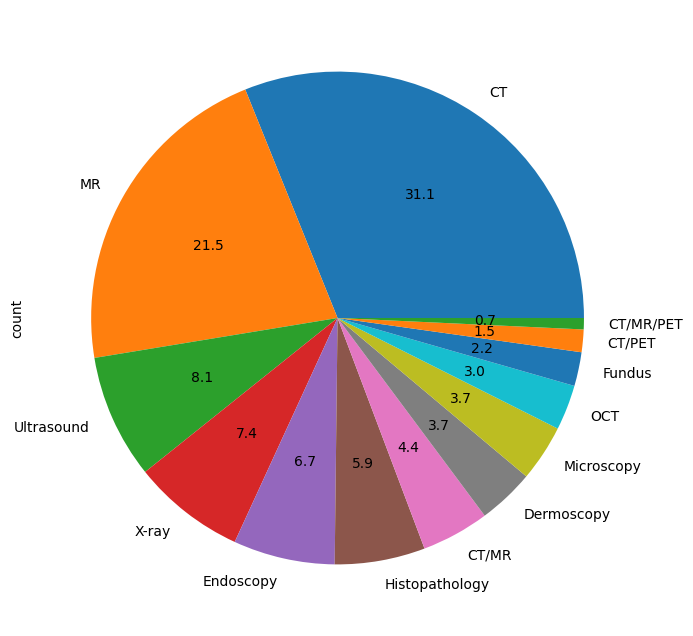

In [3]:
import matplotlib
cntBymodality = pd.value_counts(dfInfo['Modality'].values, sort=True)
#cntBymodality.plot.pie()
cntBymodality.plot.pie(figsize=(10,8), fontsize=10, autopct='%.1f')

#fig.show()
#cntBymodality.plot.bar()
#cntBymodality.plot.bar(grid=True, figsize=(10,8), fontsize=15)
#dfTestSave.groupby('Modality').count()['Dataset Name'].sort_values(ascending=False)

In [4]:
cntBymodality

CT                42
MR                29
Ultrasound        11
X-ray             10
Endoscopy          9
Histopathology     8
CT/MR              6
Dermoscopy         5
Microscopy         5
OCT                4
Fundus             3
CT/PET             2
CT/MR/PET          1
Name: count, dtype: int64

In [5]:
# foundation model list-up
dfFoundation = pd.read_csv('foundation_models.csv')
trainSet, testSet = {'dataset' : [], 'model' : []}, {'dataset' : [], 'model' : []}

for col in dfFoundation.columns.tolist():
    llr = dfFoundation[col].dropna().tolist()
    if llr[1] == 'Train dataset':
        trainSet['dataset'] = trainSet['dataset'] + llr[2:]
        trainSet['model'].append(llr[0])
    else:
        testSet['dataset'] = testSet['dataset'] + llr[2:]
        testSet['model'].append(llr[0])



print(f'[Train] {len(trainSet["dataset"])}')
print(f'[Test] {len(testSet["dataset"])}')

[Train] 268
[Test] 35


In [6]:
import re

def refiendByYear(ds):
    origin2result = {}
    result = []
    for dsN in ds:
        if dsN[-1].isdigit():
            year = re.findall(r'\d+', dsN)[-1]
            refienddsN = dsN[:-len(year)].strip() + ' '
            refienddsN += year if len(year) == 4 else ('20' + year)
        else:
            refienddsN = dsN
        result.append(refienddsN)
        origin2result[refienddsN] = dsN
    return result, origin2result

In [7]:
# existDataset - trainDataset
# 1. 중복 제거
existDs2 = list(set(existDs))
trainDs2 = list(set(trainSet["dataset"]))
print(f'[중복 제거 후]\n- 구축 데이터셋 ({len(existDs)} -> {len(existDs2)})\n- 학습에 사용한 데이터셋 ({len(trainSet["dataset"])} -> {len(trainDs2)})')

# 0. 전처리
existDs2, existMap = refiendByYear(existDs2)
trainDs2, _ = refiendByYear(trainDs2)

# 1차 검사 - 이름이 완전 일치하는 똑같은 데이터셋 삭제
TestSet = list(set(existDs2) - set(trainDs2))
print(f'[검사 후]\n- 테스트 가능 데이터셋 : {len(TestSet)}')
print(TestSet)

[중복 제거 후]
- 구축 데이터셋 (136 -> 136)
- 학습에 사용한 데이터셋 (268 -> 231)
[검사 후]
- 테스트 가능 데이터셋 : 57
['SEG.A. 2023', 'MSD_Heart', 'SegRap 2023', 'MitoEM', 'RAVIR', 'RBIS-DDSM', 'crossMoDA 2021', 'AutoPET 2023', 'TIGER', 'MSD_Hippocampus', 'BGUSIM', 'TDSC-ABUS 2023', 'GlaS@MICCAI 2015', 'PAPILA', 'Shifts 2022', 'LOLA 2011', 'Uwaterloo Skin Cancer', '3DLSC-COVID', 'MoNuSAC 2020', 'PathologyIMagesForGlandSeg', 'VESsel 2012', 'CrossModa 2022', 'MSD_Brain', 'ARCADE', 'ICIAR 2018', 'SPIDER', 'COVID-19 Radiography', 'EDD 2020', 'NSCLC Pleural Effusion(PleThora)', 'QUBIQ 2021', 'VALDo', 'InnerEarSeg', 'DRIVE', 'HCC-TACE-Seg', 'Med-DDPM', 'SegPC 2021', 'MSD-Hepatic', 'BCSS', 'PASeg', 'BrainPTM', 'kvasir', 'SMRA 2021', 'IDRiD', 'ATLAS 2023', 'DRAC 2022', 'MouseEmbryoSeg', 'CC-Tumor Heterogeneity', 'BSISeg', 'SEMI3D 2013', '3DTeethSeg 2022', 'ULS 2023', 'ONETOMANY_TOOLSYNSEG', 'WSSS4LUAD', 'ToothFairy', 'LiTS 2017', 'Curious 2022', 'FLARE 2023']


In [8]:
# Test용 데이터셋 정보까지 합친 dataframe create
dfTestSave = pd.DataFrame({
    'Dataset Name' : [], 'Modality' : [], 'Body Part' : [], 'Sub-region' : [], 'Segmentation Targets' : [], 'Dimension' : []
})
dfTestSave
for tsN in TestSet:
    rawName = existMap[tsN]
    dfNew = dfInfo[dfInfo['Dataset Name'] == rawName]
    dfTestSave = pd.concat([dfTestSave, dfNew])

dfTestSave = dfTestSave.sort_values(by='Modality')
dfTestSave.to_csv('./ExternalEval.csv', index=False)
dfTestSave.head(10)

,Dataset Name,Modality,Body Part,Sub-region,Segmentation Targets,Dimension,Secure,Link
140,SEG.A. 2023,CT,Abdomen,-,Aortic Vessel Tree,3D,O,https://multicenteraorta.grand-challenge.org/
91,LiTS17,CT,Abdomen,Liver,"Liver, Tumor",3D,O,https://competitions.codalab.org/competitions/...
105,ToothFairy,CT,Head and Neck,Mandible,Mandibular Cana,3D,O,https://ditto.ing.unimore.it/toothfairy/
106,ULS2023,CT,Whole,-,Universal Lesion,3D,O,https://uls23.grand-challenge.org/datasets/
13,MSD-Hepatic,CT,Abdomen,Hepatic,Hepatic tumor,3D,O,http://medicaldecathlon.com/
6,HCC-TACE-Seg,CT,Abdomen,Liver,"Liver, Tumor(HCC)",3D,O,https://wiki.cancerimagingarchive.net/pages/vi...
154,InnerEarSeg,CT,Head and Neck,Ear,INNER EAR,3D,O,https://ieee-dataport.org/documents/ct-trainin...
86,VESsel12,CT,Thorax,Lung,Blood vessels,3D,O,https://vessel12.grand-challenge.org/
155,3DLSC-COVID,CT,Thorax,Chest,"COVID-19, CAP",3D,O,https://ieee-dataport.org/documents/3dlsc-covid
125,LOLA11,CT,Thorax,Lung,"Lung, Lobe",3D,O,https://lola11.grand-challenge.org/Home/


---


/tmp/ipykernel_203989/1199477578.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cntBymodality = pd.value_counts(dfTestSave['Modality'].values, sort=True)


<Axes: >

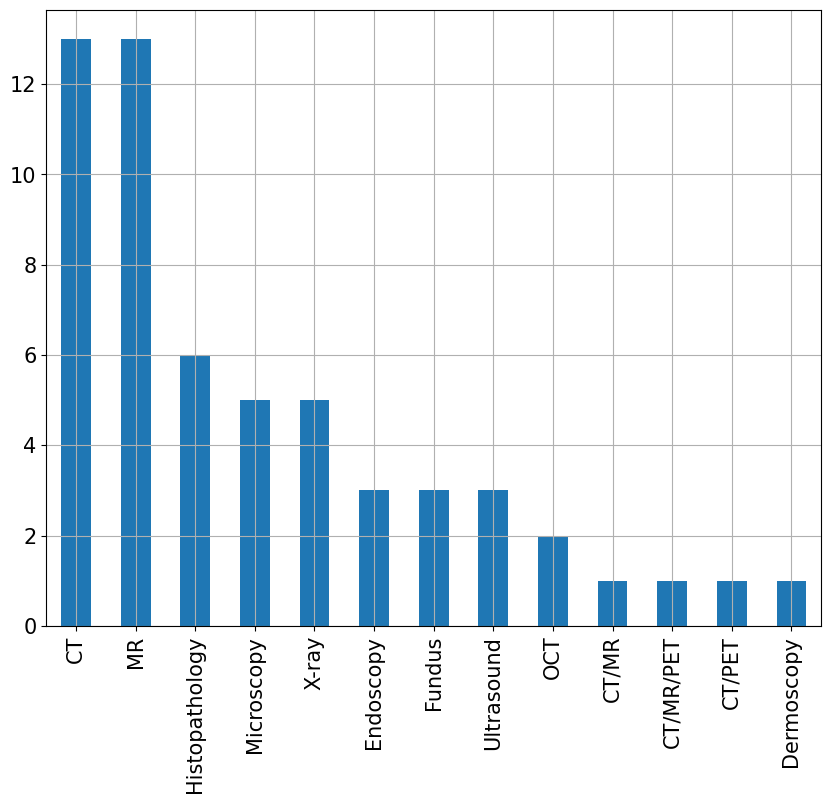

In [9]:
import matplotlib
cntBymodality = pd.value_counts(dfTestSave['Modality'].values, sort=True)
cntBymodality.plot.bar()
cntBymodality.plot.bar(grid=True, figsize=(10,8), fontsize=15)
#dfTestSave.groupby('Modality').count()['Dataset Name'].sort_values(ascending=False)

In [10]:
dfTestSave[dfTestSave['Modality'] == 'OCT']

,Dataset Name,Modality,Body Part,Sub-region,Segmentation Targets,Dimension,Secure,Link
123,DRIVE,OCT,Head and Neck,Eye,Vessel,2D,O,https://drive.grand-challenge.org/
136,DRAC2022,OCT,Head and Neck,Eye,Diabetic Retinopathy Lesions.,2D,O,https://drac22.grand-challenge.org/Description/
